In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import plot_util
import pathlib

In [12]:
cwd = pathlib.Path.cwd()
input_dir = cwd / 'data'

In [13]:
data = pd.read_csv(input_dir / 'units.csv', index_col=[0, 1, 2])
data.head()

1 unit  2 units  3-4 units  5+ units  Population
State County Code Year                                                        
AK    0           1992-01-01     0.0      0.0        0.0       0.0         NaN
                  1992-01-01     0.0      0.0        0.0       0.0         NaN
                  1992-01-01     0.0      0.0        0.0       0.0         NaN
                  1993-01-01     0.0      0.0        0.0       0.0         NaN
                  1993-01-01     0.0      0.0        0.0       0.0         NaN

In [14]:
geo_info = pd.read_csv(input_dir / 'geo_info.csv', index_col=[0, 1])
geo_info.head()

Place Name  State Code  6-Digit ID  \
State County Code                                                              
AK    0            Balance of State-Part 1 Anchorage           2       69000   
      0            Balance of State-Part 2 Fairbanks           2       73000   
      0               Balance of State-Part 3 Juneau           2       77000   
      0            Balance of State-Part 1 Anchorage           2       69000   
      0            Balance of State-Part 2 Fairbanks           2       73000   

                   2018 Population  
State County Code                   
AK    0                        NaN  
      0                        NaN  
      0                        NaN  
      0                        NaN  
      0                        NaN

Pivot Tables

In [4]:
data['Single Family'] = data['1 unit']
data['Multifamily'] = data['2 units'] + data['3-4 units'] + data['5+ units']
data.head()

1 unit  2 units  3-4 units  5+ units  \
State County Code Year                                               
AK    0           1992-01-01     0.0      0.0        0.0       0.0   
                  1992-01-01     0.0      0.0        0.0       0.0   
                  1992-01-01     0.0      0.0        0.0       0.0   
                  1993-01-01     0.0      0.0        0.0       0.0   
                  1993-01-01     0.0      0.0        0.0       0.0   

                              Population  Single Family  Multifamily  
State County Code Year                                                
AK    0           1992-01-01         NaN            0.0          0.0  
                  1992-01-01         NaN            0.0          0.0  
                  1992-01-01         NaN            0.0          0.0  
                  1993-01-01         NaN            0.0          0.0  
                  1993-01-01         NaN            0.0          0.0

In [7]:
df = data.reset_index().pivot_table(index=['State', 'Year'], values=['Single Family', 'Multifamily'], aggfunc=np.sum, fill_value=0.)
df.head()

Multifamily  Single Family
State Year                                  
AK    1980-01-01          609           1621
      1981-01-01         1489           3025
      1982-01-01         3969           4273
      1983-01-01         6749           4586
      1984-01-01         3012           3779

In [15]:
df.to_csv(input_dir / 'totals_by_state.csv')

In [9]:
fractions = df.apply(lambda x: x / df.sum(axis=1))
fractions.head()

Multifamily  Single Family
State Year                                  
AK    1980-01-01     0.273094       0.726906
      1981-01-01     0.329863       0.670137
      1982-01-01     0.481558       0.518442
      1983-01-01     0.595412       0.404588
      1984-01-01     0.443528       0.556472

In [16]:
charts_dir = input_dir / 'charts'
charts_dir.mkdir(exist_ok=True)

In [18]:
states = df.index.levels[0]
states

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='State')

In [26]:
def convert_to_yyyy(year):
    return np.int(year[:4])
df1 = df.rename(mapper=convert_to_yyyy, axis=0, level=1)
df1 /= 1000
df1.head()

Multifamily  Single Family
State Year                            
AK    1980        0.609          1.621
      1981        1.489          3.025
      1982        3.969          4.273
      1983        6.749          4.586
      1984        3.012          3.779

/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/subin/.local/share/virtualenvs/building-permits-survey-zHZdvx4y/lib/python3.7/site-

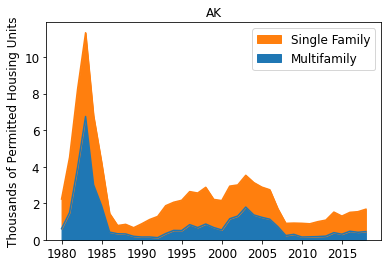

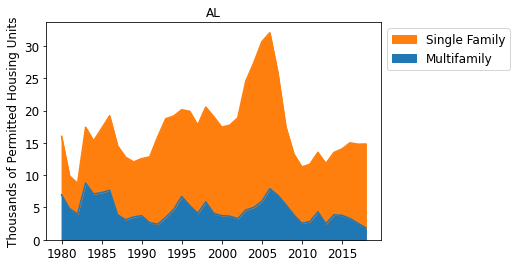

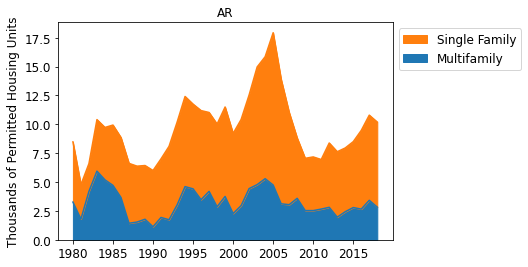

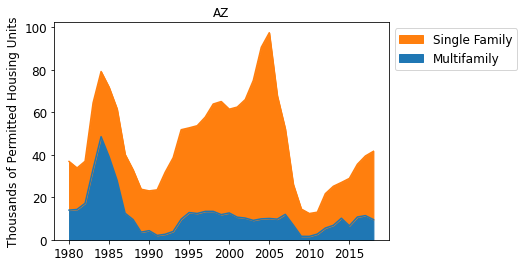

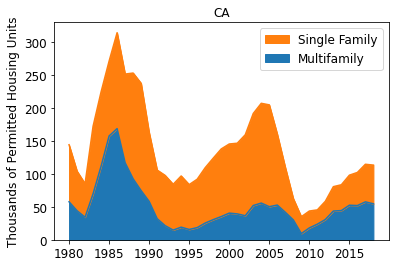

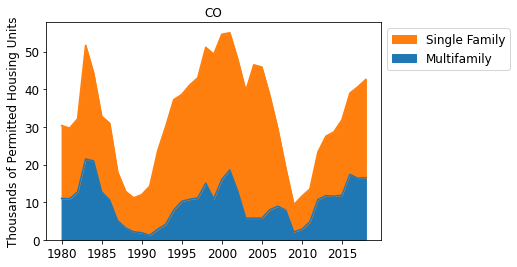

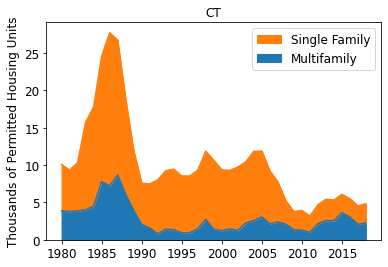

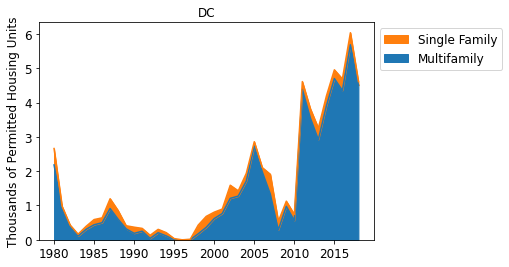

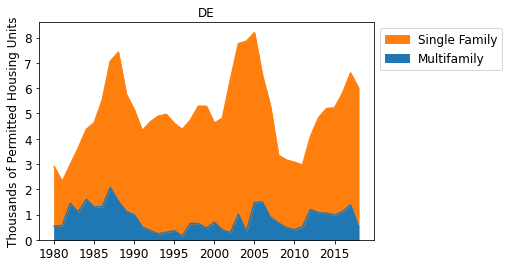

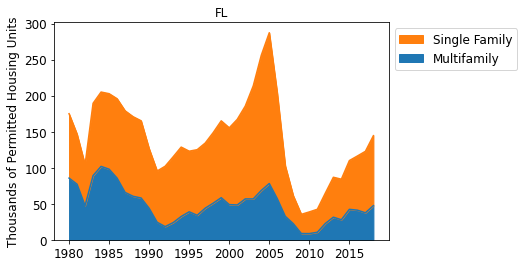

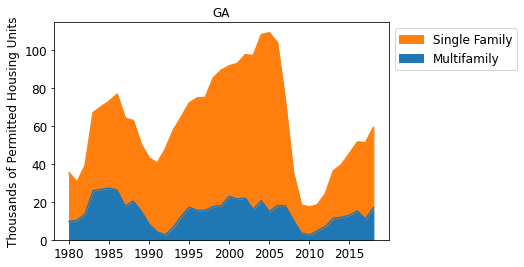

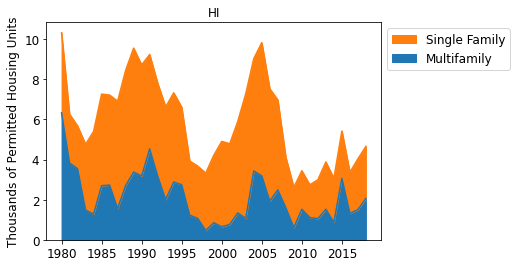

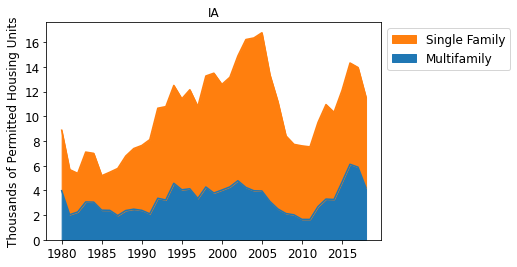

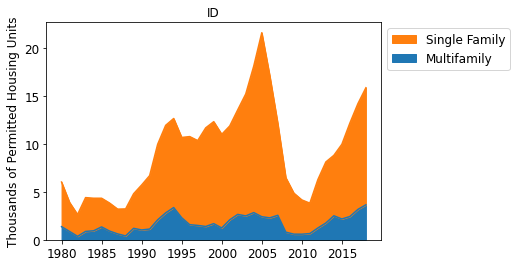

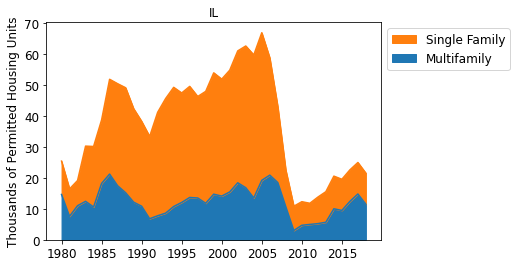

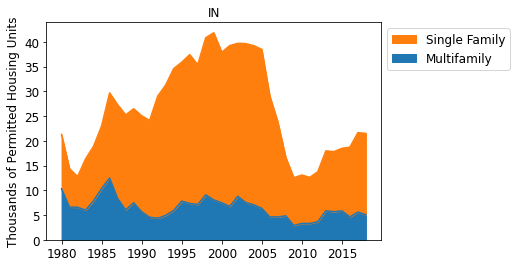

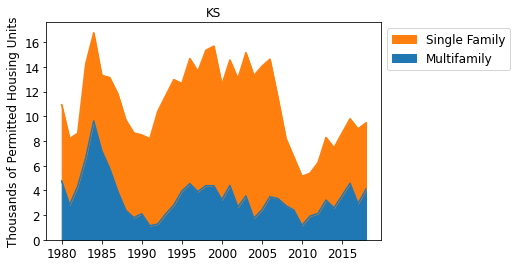

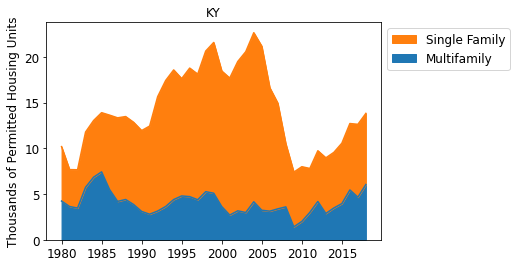

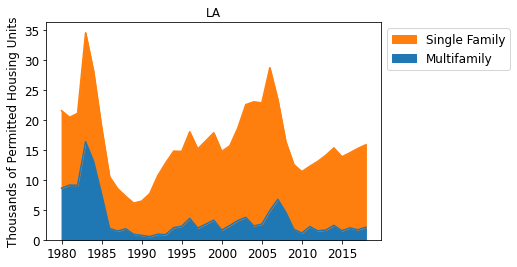

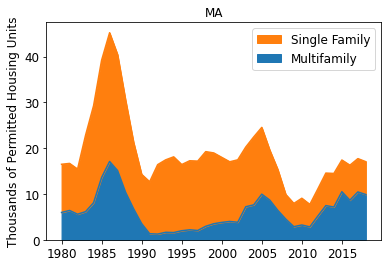

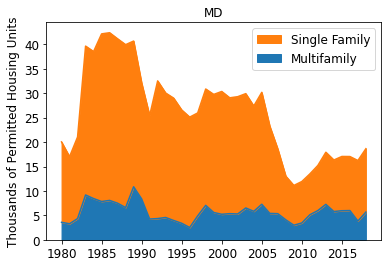

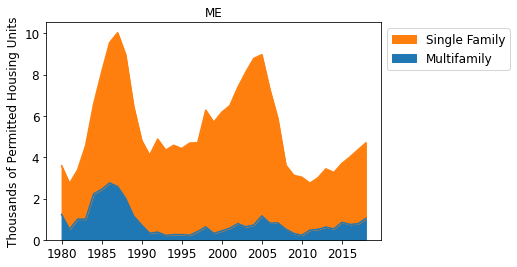

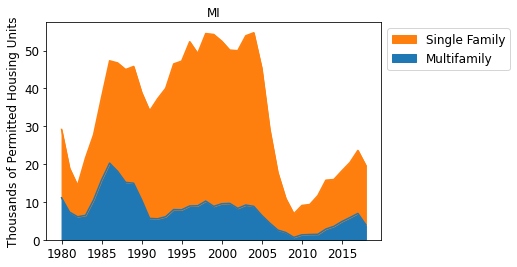

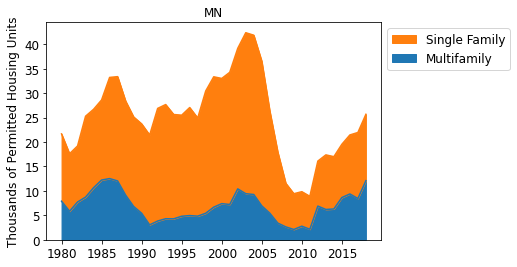

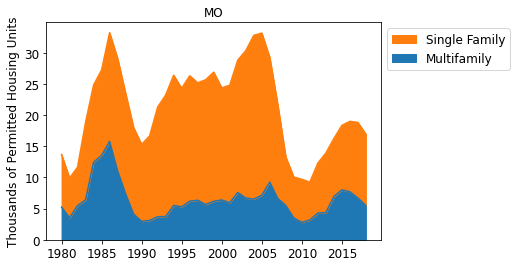

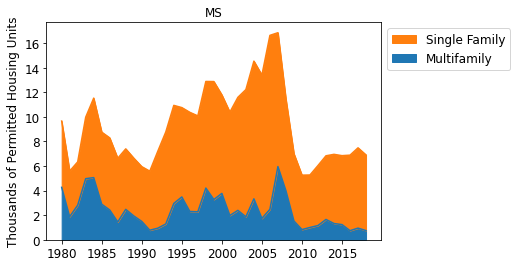

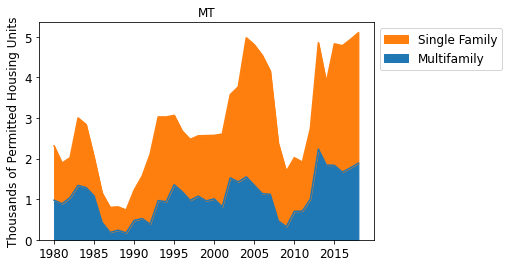

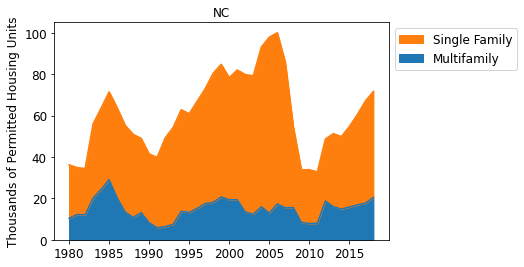

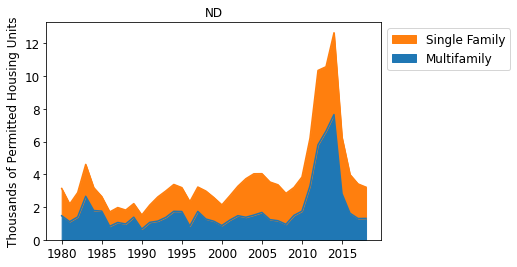

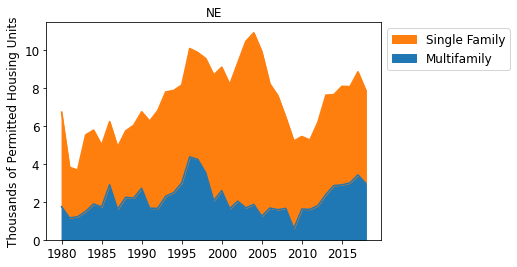

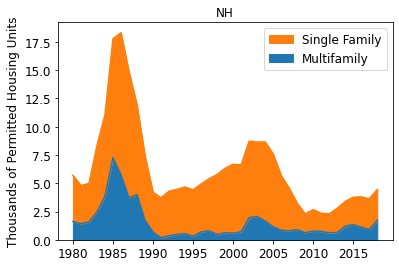

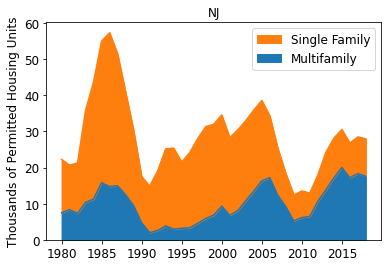

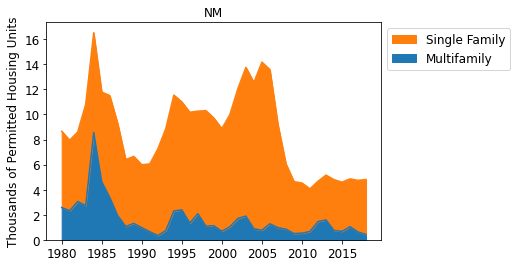

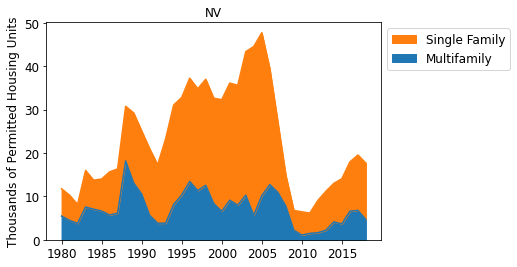

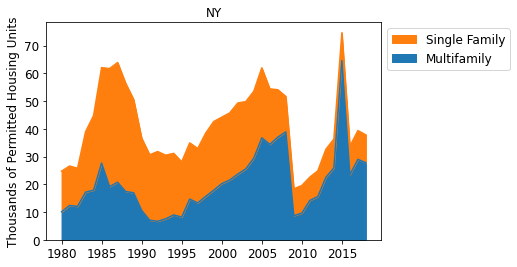

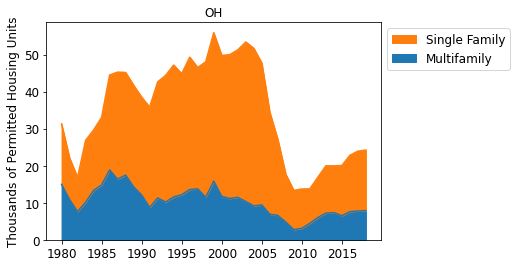

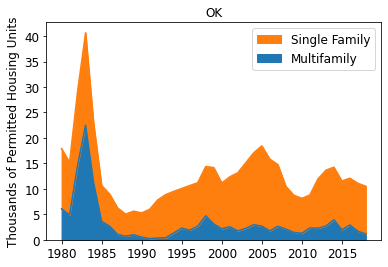

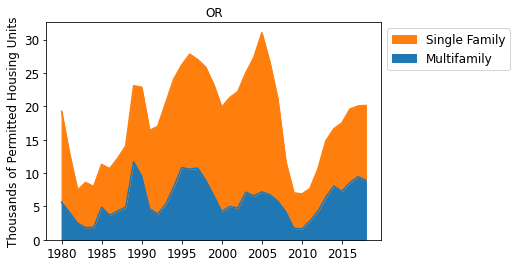

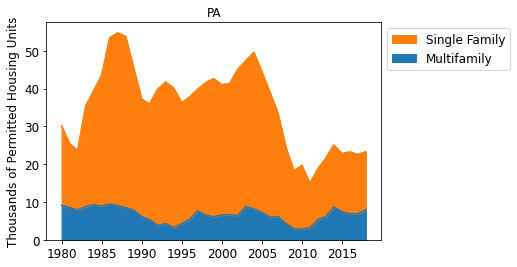

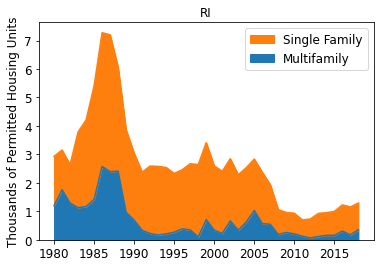

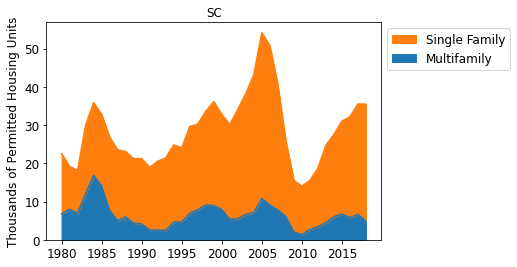

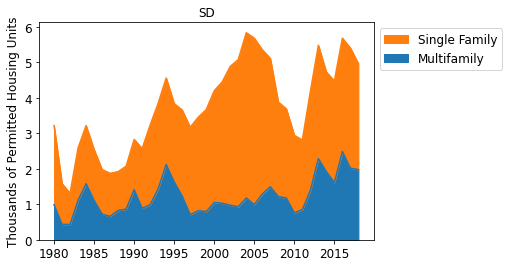

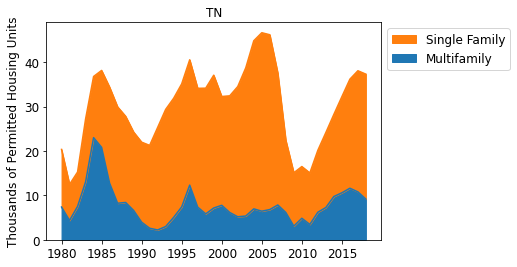

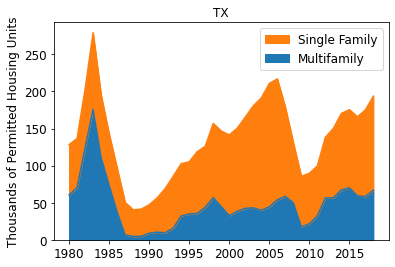

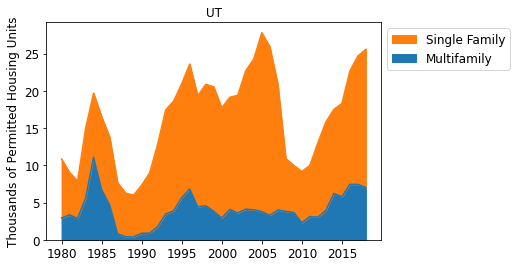

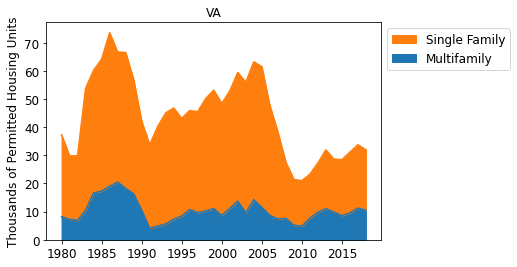

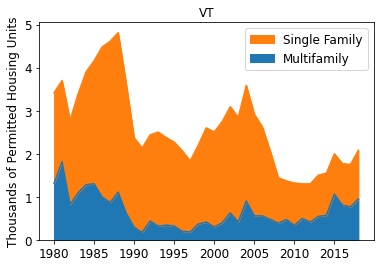

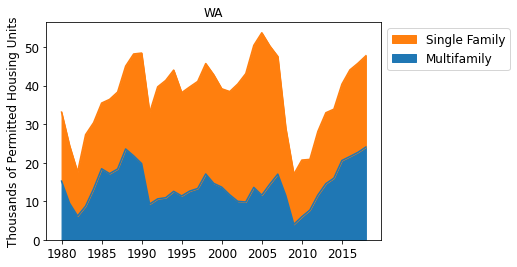

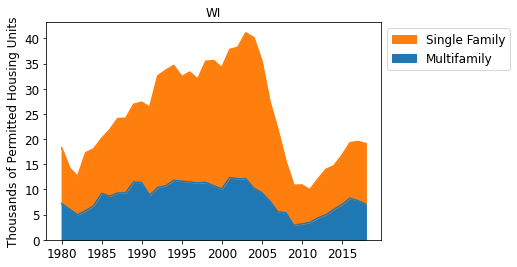

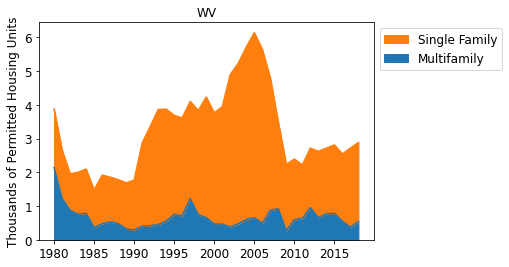

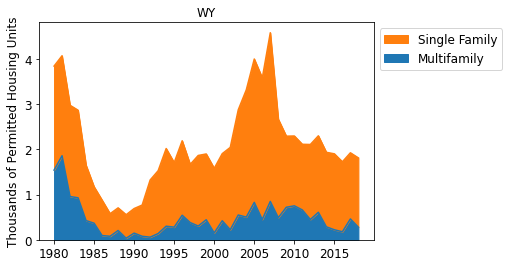

In [28]:
for state in states:
    plot_util.generic_plot(df1.loc[state], kind='area', title=state, ylabel='Thousands of Permitted Housing Units', output_directory=charts_dir)

Dig into sub-state

In [31]:
# How many distinct county codes are there?
data.groupby(['State', 'County Code']).count()

1 unit  2 units  3-4 units  5+ units  Population
State County Code                                                  
AK    0                69       69         69        69           6
      13               87       87         87        87          36
      16               45       45         45        45          24
      20               39       39         39        39          12
      50               29       29         29        29          12
...                   ...      ...        ...       ...         ...
WY    37              247      247        247       247          82
      39               78       78         78        78          22
      41              158      158        158       158          52
      43               77       77         77        77          24
      45               78       78         78        78          24

[3107 rows x 5 columns]

In [32]:
data.groupby(['State', 'County Code']).count().sum()

1 unit        738461
2 units       738461
3-4 units     738461
5+ units      738461
Population    198054
dtype: int64

In [33]:
# Compare to 40 yr of data
3107 * 40

124280

In [37]:
len(geo_info)

738605